In [3]:
import pandas
print (pandas.__version__)

2.2.2


In [5]:
pip list

Package                           Version
--------------------------------- ------------------
accessible-pygments               0.0.5
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
affine                            2.4.0
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiolimiter                        1.2.1
aiosignal                         1.2.0
alabaster                         0.7.16
albucore                          0.0.24
albumentations                    2.0.8
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-cat

In [7]:
import pandas as pd 
data = "AnemiaTipos.csv"

dataset = pd.read_csv(data)

dataset

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1146,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1147,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1148,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [9]:
# Librerías para el desarrollo del proyecto
import matplotlib.pyplot as plt  # Librería para gráficas
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.ticker import StrMethodFormatter
import seaborn as sb

# Librerías pandas para el manejo de los datos
import pandas as pd
import pandas as pq
import pandas as pf
import pandas as filtro_filas

# Enlazando los datos en el archivo CSV
data = pd.read_csv("AnemiaTipos.csv", index_col=None)
import numpy as np
# Invocando a la librería
from lightgbm import LGBMClassifier  # salu2

In [10]:
#Verificamos cuantos tipos de enfermedades hay :V
print(data.groupby('Diagnosis').size())

Diagnosis
Healthy                           336
Iron deficiency anemia            189
Macrocytic anemia                  18
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Other microcytic anemia            59
dtype: int64


In [13]:
X = data[['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'PLT', 'PDW', 'PCT']]

In [15]:
X.shape

(1150, 14)

In [17]:
Y = data['Diagnosis']
#ya = data_datos["CALIFICACION"] 
Y.shape

(1150,)

## CODIFICANDO "Y"

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_codificado = le.fit_transform(Y)

# Mostrar la codificación de cada clase
print("Codificación de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{clase} -> {i}")

Codificación de clases:
Healthy -> 0
Iron deficiency anemia -> 1
Macrocytic anemia -> 2
Normocytic hypochromic anemia -> 3
Normocytic normochromic anemia -> 4
Other microcytic anemia -> 5


In [22]:
print(le.classes_)
##EN ESE ORDEN ESTAN PARA EL SISTEMA, DE AHI SACA 0 1 2 3 4 5 -->

['Healthy' 'Iron deficiency anemia' 'Macrocytic anemia'
 'Normocytic hypochromic anemia' 'Normocytic normochromic anemia'
 'Other microcytic anemia']


In [24]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## PARTICIONAMIENTO DE LA DATA

In [39]:
from sklearn.model_selection import train_test_split

# Aquí usas X sin cambios y la Y codificada
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y_codificado, test_size=0.2, random_state=0)
print("---")
print(f"Entrenamiento: {X_trainset.shape[0]} muestras, {X_trainset.shape[1]} variables")
print(f"Etiquetas entrenamiento: {y_trainset.shape[0]} valores")
print(f"Prueba: {X_testset.shape[0]} muestras, {X_testset.shape[1]} variables")
print(f"Etiquetas prueba: {y_testset.shape[0]} valores")

---
Entrenamiento: 920 muestras, 14 variables
Etiquetas entrenamiento: 920 valores
Prueba: 230 muestras, 14 variables
Etiquetas prueba: 230 valores


## BALANCEANDO

In [42]:
from imblearn.combine import SMOTEENN
from collections import Counter

print("Distribución antes del resampling:", Counter(y_trainset))

os_us = SMOTEENN(sampling_strategy='auto', random_state=0)
X_train_res, y_train_res = os_us.fit_resample(X_trainset, y_trainset)

print("Distribución tras aplicar SMOTE-ENN:", Counter(y_train_res))

Distribución antes del resampling: Counter({0: 272, 3: 225, 4: 208, 1: 151, 5: 49, 2: 15})
Distribución tras aplicar SMOTE-ENN: Counter({2: 259, 5: 229, 4: 198, 0: 195, 1: 184, 3: 109})


## MODELO STACKING TABNET


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Convertir a numpy si es necesario
X_train_np = X_train_res.to_numpy() if hasattr(X_train_res, 'to_numpy') else X_train_res
X_test_np = X_testset.to_numpy() if hasattr(X_testset, 'to_numpy') else X_testset
y_train_np = np.array(y_train_res)
y_test_np = np.array(y_testset)

# Modelos base
modelo_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=10, splitter='best', random_state=42)
modelo_rf = RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2', n_estimators=100, random_state=42)
model_cb = CatBoostClassifier(depth=7, iterations=200, l2_leaf_reg=3, learning_rate=0.1, verbose=0, random_state=42)
modelo_lgbm = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=100, num_leaves=31, random_state=42)
modelo_xgb_base = XGBClassifier(gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Lista de modelos base
modelos_base = [
    ('dt', modelo_dt),
    ('rf', modelo_rf),
    ('cb', model_cb),
    ('lgbm', modelo_lgbm),
    ('xgb', modelo_xgb_base)
]

# Entrenar modelos base y recolectar predicciones en entrenamiento
meta_features_train = []
for name, model in modelos_base:
    model.fit(X_train_np, y_train_np)
    probs = model.predict_proba(X_train_np)
    meta_features_train.append(probs)

meta_X_train = np.hstack(meta_features_train)

# Recolectar predicciones en prueba
meta_features_test = []
for name, model in modelos_base:
    probs = model.predict_proba(X_test_np)
    meta_features_test.append(probs)

meta_X_test = np.hstack(meta_features_test)

# Meta-modelo: TabNetClassifier
meta_model = TabNetClassifier(n_d=24, n_a=24, n_steps=5, gamma=1.5, lambda_sparse=0.0001, optimizer_params=dict(lr=0.002), scheduler_params={"step_size": 10, "gamma": 0.9}, mask_type='sparsemax', momentum=0.3, verbose=0, seed=42)

# Entrenamiento del meta-modelo con las predicciones de los modelos base
meta_model.fit(
    X_train=meta_X_train,
    y_train=y_train_np,
    eval_set=[(meta_X_test, y_test_np)],
    eval_metric=['accuracy'],
    max_epochs=150,
    patience=20,
    batch_size=512,
    virtual_batch_size=64
)

# Evaluación final
y_pred = meta_model.predict(meta_X_test)
print(classification_report(y_test_np, y_pred, digits=7))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3156
[LightGBM] [Info] Number of data points in the train set: 1174, number of used features: 14
[LightGBM] [Info] Start training from score -1.795172
[LightGBM] [Info] Start training from score -1.853236
[LightGBM] [Info] Start training from score -1.511344
[LightGBM] [Info] Start training from score -2.376824
[LightGBM] [Info] Start training from score -1.779905
[LightGBM] [Info] Start training from score -1.634450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

C:\Users\luisc\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Early stopping occurred at epoch 109 with best_epoch = 89 and best_val_0_accuracy = 0.94783
              precision    recall  f1-score   support

           0  0.9833333 0.9218750 0.9516129        64
           1  0.9743590 1.0000000 0.9870130        38
           2  0.6000000 1.0000000 0.7500000         3
           3  0.9636364 0.9814815 0.9724771        54
           4  0.9666667 0.9508197 0.9586777        61
           5  0.6363636 0.7000000 0.6666667        10

    accuracy                      0.9478261       230
   macro avg  0.8540598 0.9256960 0.8810746       230
weighted avg  0.9527202 0.9478261 0.9492152       230



C:\Users\luisc\anaconda3\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [70]:
y_decodificado = le.inverse_transform(y_codificado)

print(y_codificado)
print(y_decodificado)

[3 3 1 ... 0 0 0]
['Normocytic hypochromic anemia' 'Normocytic hypochromic anemia'
 'Iron deficiency anemia' ... 'Healthy' 'Healthy' 'Healthy']


## MÉTRICAS DEL MODELO (TRAIN)

In [72]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import column_or_1d
import numpy as np

# Asegurar que y_train esté en formato plano
y_train_vec = column_or_1d(y_train_np)

# Obtener predicciones y probabilidades del meta-modelo (TabNet)
y_pred = meta_model.predict(meta_X_train)
y_probs = meta_model.predict_proba(meta_X_train)

# Calcular y mostrar métricas
print('=== Métricas del Modelo (entrenamiento con meta-modelo TabNet) ===')
print('Accuracy:', accuracy_score(y_train_vec, y_pred), '→', accuracy_score(y_train_vec, y_pred) * 100, '%')
print('Precisión:', precision_score(y_train_vec, y_pred, average='macro'), '→', precision_score(y_train_vec, y_pred, average='macro') * 100, '%')
print('Sensibilidad (Recall):', recall_score(y_train_vec, y_pred, average='macro'), '→', recall_score(y_train_vec, y_pred, average='macro') * 100, '%')
print('F1-score:', f1_score(y_train_vec, y_pred, average='macro'), '→', f1_score(y_train_vec, y_pred, average='macro') * 100, '%')

# Calcular ROC AUC
if len(np.unique(y_train_vec)) == 2:
    roc_auc = roc_auc_score(y_train_vec, y_probs[:, 1])
else:
    y_bin = LabelBinarizer().fit_transform(y_train_vec)
    roc_auc = roc_auc_score(y_bin, y_probs, multi_class='ovr')

print('ROC AUC:', roc_auc, '→', roc_auc * 100, '%')
print('Matthews Corrcoef:', matthews_corrcoef(y_train_vec, y_pred))


=== Métricas del Modelo (entrenamiento con meta-modelo TabNet) ===
Accuracy: 1.0 → 100.0 %
Precisión: 1.0 → 100.0 %
Sensibilidad (Recall): 1.0 → 100.0 %
F1-score: 1.0 → 100.0 %
ROC AUC: 1.0 → 100.0 %
Matthews Corrcoef: 1.0


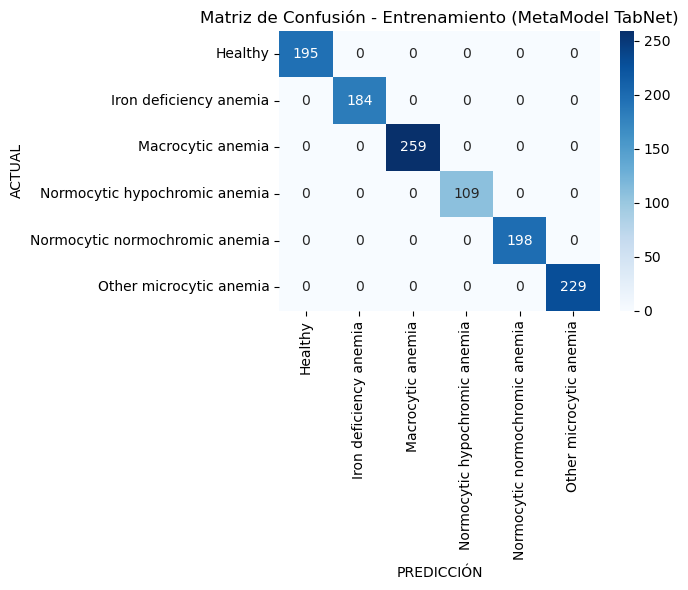

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Obtener predicciones del meta-modelo (TabNet)
y_train_pred = meta_model.predict(meta_X_train)

# Decodificar si usaste LabelEncoder
y_true_labels_train = le.inverse_transform(y_train_np)
y_pred_labels_train = le.inverse_transform(y_train_pred)

# Matriz de confusión
conf_matrix_train = pd.crosstab(
    pd.Series(y_true_labels_train, name='ACTUAL'),
    pd.Series(y_pred_labels_train, name='PREDICCIÓN')
)

# Plot
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Entrenamiento (MetaModel TabNet)')
plt.tight_layout()
plt.show()


## MÉTRICAS DEL MODELO (TEST)

In [80]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Asegurar formato numpy
y_test_vec = y_testset.values if hasattr(y_testset, "values") else y_testset

# Predicciones y probabilidades del meta-modelo (TabNet)
y_pred = meta_model.predict(meta_X_test)
y_probs = meta_model.predict_proba(meta_X_test)

# Métricas
print('=== Métricas del Modelo (Prueba) ===')
print('Accuracy:', accuracy_score(y_test_vec, y_pred), '→', accuracy_score(y_test_vec, y_pred) * 100, '%')
print('Precisión:', precision_score(y_test_vec, y_pred, average='macro'), '→', precision_score(y_test_vec, y_pred, average='macro') * 100, '%')
print('Recall (Sensibilidad):', recall_score(y_test_vec, y_pred, average='macro'), '→', recall_score(y_test_vec, y_pred, average='macro') * 100, '%')
print('F1-score:', f1_score(y_test_vec, y_pred, average='macro'), '→', f1_score(y_test_vec, y_pred, average='macro') * 100, '%')

# ROC AUC
if len(np.unique(y_test_vec)) == 2:
    roc_auc = roc_auc_score(y_test_vec, y_probs[:, 1])
else:
    y_bin = LabelBinarizer().fit_transform(y_test_vec)
    roc_auc = roc_auc_score(y_bin, y_probs, multi_class='ovr')

print('ROC AUC:', roc_auc, '→', roc_auc * 100, '%')
print('Matthews Corrcoef:', matthews_corrcoef(y_test_vec, y_pred))


=== Métricas del Modelo (Prueba) ===
Accuracy: 0.9478260869565217 → 94.78260869565217 %
Precisión: 0.8540598290598291 → 85.40598290598291 %
Recall (Sensibilidad): 0.9256960256021048 → 92.56960256021048 %
F1-score: 0.8810745511793429 → 88.10745511793428 %
ROC AUC: 0.9891452290479602 → 98.91452290479602 %
Matthews Corrcoef: 0.9326760791017863


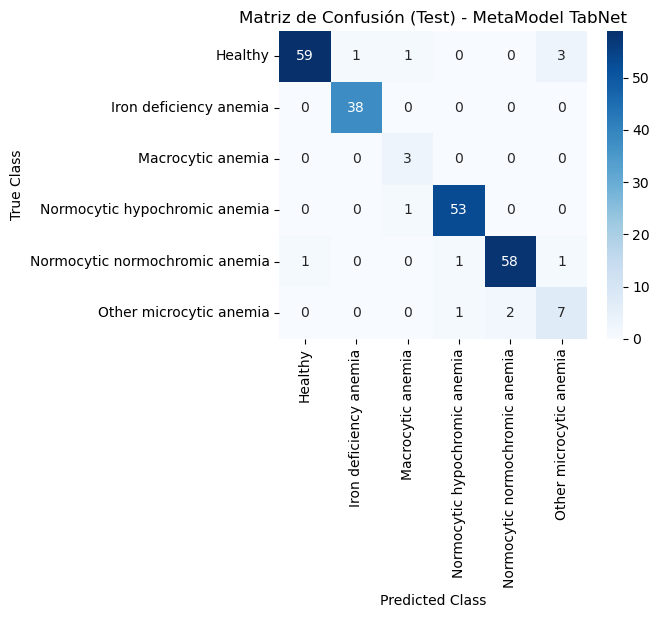

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Predicciones del modelo meta (TabNet)
y_test_pred = meta_model.predict(meta_X_test)

# Decodificar etiquetas si usaste LabelEncoder
y_true_labels = le.inverse_transform(y_test_np)
y_pred_labels = le.inverse_transform(y_test_pred)

# Crear matriz de confusión
conf_matrix = pd.crosstab(
    pd.Series(y_true_labels, name='ACTUAL'),
    pd.Series(y_pred_labels, name='PREDICCIÓN')
)

# Gráfico
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Matriz de Confusión (Test) - MetaModel TabNet')
plt.tight_layout()
plt.show()


## ROC CURVE (TRAIN)

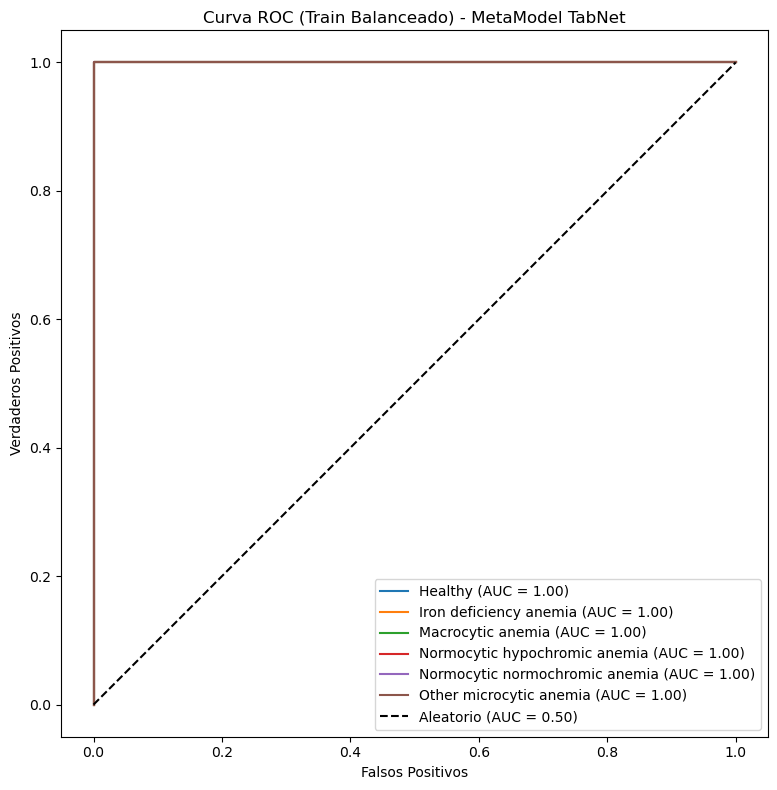

In [85]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades para todas las clases del meta-modelo (TabNet)
probs = meta_model.predict_proba(meta_X_train)

# Binarizar etiquetas reales (y_train_np)
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_np)

# Crear la figura
plt.figure(figsize=(8, 8))

# Graficar curva ROC para cada clase
for i in range(y_train_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(fpr, tpr, label=f'{clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], "k--", label="Aleatorio (AUC = 0.50)")

# Etiquetas y estilo
plt.axis("square")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC (Train Balanceado) - MetaModel TabNet")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## ROC CURVE (TEST)

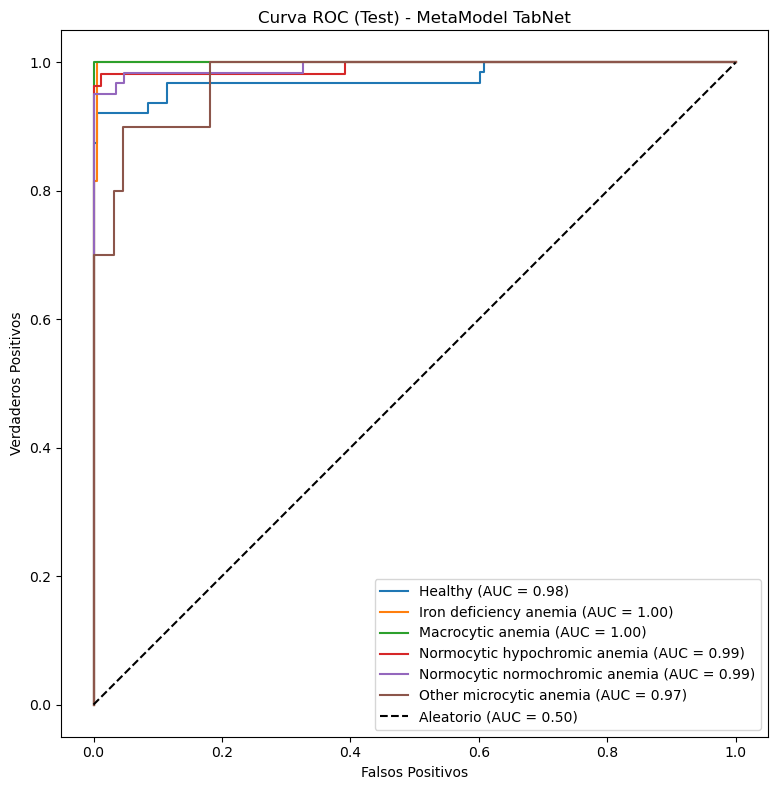

In [87]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Obtener probabilidades del meta-modelo (TabNet) en test
probs = meta_model.predict_proba(meta_X_test)

# Binarizar las etiquetas verdaderas de test
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_np)

# Crear figura
plt.figure(figsize=(8, 8))

# Curva ROC para cada clase
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    clase_decodificada = le.inverse_transform([i])[0]  # clase con nombre real
    plt.plot(fpr, tpr, label=f'{clase_decodificada} (AUC = {roc_auc:.2f})')

# Línea diagonal aleatoria
plt.plot([0, 1], [0, 1], "k--", label="Aleatorio (AUC = 0.50)")

# Estilo
plt.axis("square")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC (Test) - MetaModel TabNet")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


## PRECISION RECALL CURVE (TRAIN)

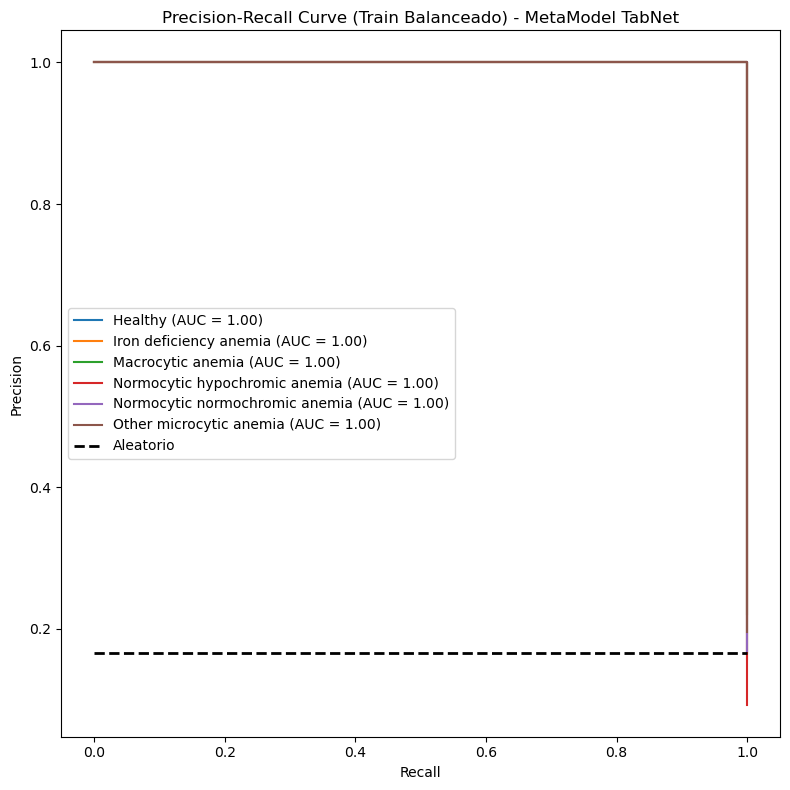

In [89]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarizar etiquetas verdaderas
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train_np)

# Obtener probabilidades del meta_model sobre el conjunto de entrenamiento (balanceado)
probs = meta_model.predict_proba(meta_X_train)

# Crear gráfico
plt.figure(figsize=(8, 8))

# Precision-Recall para cada clase
for i in range(y_train_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_train_bin[:, i], probs[:, i])
    pr_auc = auc(recall, precision)
    clase_nombre = le.inverse_transform([i])[0]
    plt.plot(recall, precision, label=f'{clase_nombre} (AUC = {pr_auc:.2f})')

# Línea de referencia
no_skill = len(y_train_np[y_train_np == y_train_np[0]]) / len(y_train_np)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2, label='Aleatorio')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Train Balanceado) - MetaModel TabNet')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


## PRECISION RECALL CURVE (TEST)

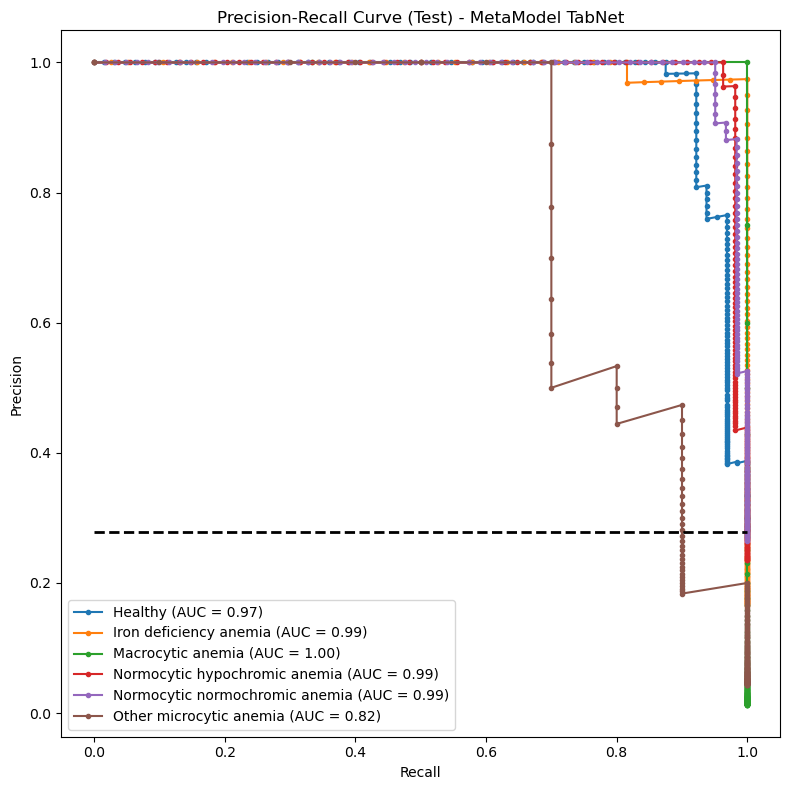

In [91]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Binarizar etiquetas reales del test
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_np)

# Obtener probabilidades del meta-modelo
probs = meta_model.predict_proba(meta_X_test)

# Crear figura
plt.figure(figsize=(8, 8))

# Graficar PR curve para cada clase
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], probs[:, i])
    pr_auc = auc(recall, precision)
    clase_decodificada = le.inverse_transform([i])[0]
    plt.plot(recall, precision, marker='.', label=f'{clase_decodificada} (AUC = {pr_auc:.2f})')

# Línea no-skill
no_skill = len(y_test_np[y_test_np == y_test_np[0]]) / len(y_test_np)
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2)

# Detalles del gráfico
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test) - MetaModel TabNet')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [94]:
import joblib
import os

# Crear la carpeta Models si no existe
os.makedirs("Models", exist_ok=True)

# Guardar el modelo y el codificador
joblib.dump({'modelo': stacking_model, 'label_encoder': le}, 'Models/tabnet.pkl')


['Models/tabnet.pkl']